# Data for Principal Component Analysis

I use this notebook to create a randomized ice cream sundae data set.  We will perform PCA on this and look at how many dimensions we are able to reduce, how the data is transformed to new coordinates based on the PCs, and how to interpret relationships in the data by examining the PCs.  We can also check for nonlinearity in the data set that would inform us that PCA is not a good choice for interpretation of this data.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.decomposition import PCA
import seaborn as sns

%matplotlib notebook

In [25]:
# Create the data set.  These random numbers are not seeded, so the resulting data will vary everytime this is run.

#sundae ingredients: ice cream, chocolate syrup, caramel syrup, marshmallow syrup, whipped cream, nuts, cherry, banana
numrows = 1000
#ice cream:
flavors = {0:'sweet cream',1:'vanilla',2:'mexican vanilla',3:'triplemex'}
icecreamcat = np.random.randint(0,len(flavors),numrows)
icecreamflav = [flavors[x] for x in icecreamcat]

#syrups can come in 1/2 pump units, up to 3 (what madman would have more than 3?!)
#all values are forced to be positive, since you can't have negative toppings
hotfudge = abs(np.random.normal(2,1,numrows)) #mean 2, stdev 1
caramel = abs(1/hotfudge - np.random.normal(0,0.5,numrows)) #1/hf - mean 0, stdev 0.5
fluff = abs(hotfudge - np.random.randint(0,2,numrows)/2) #hf - random 0-2, in 0.5 increments
whip = abs(np.random.normal(1,0.2,numrows)) #mean 1, stdev 0.2
nuts = abs(np.random.normal(0.5,0.5,numrows)) #mean 0.5, stdev 0.5

#discrete number of cherries (0, 1, or 2)
cherry = np.random.randint(0,2,numrows)

#number of banana slices (estimated 20 slices per banana)
banana = np.random.randint(0,20,numrows)

#create DataFrame
sundae_df = pd.DataFrame(icecreamflav,columns=['flavor'])
sundae_df['ice_cream'] = icecreamcat
sundae_df['hot_fudge'] = hotfudge
sundae_df['caramel'] = caramel
sundae_df['marshmallow'] = fluff
sundae_df['whipped_cream'] = whip
sundae_df['nuts'] = nuts
sundae_df['cherry'] = cherry
sundae_df['banana'] = banana

In [26]:
#calorie calculator, amounts via googling

# ice cream = 137
# hot fudge = 130
# caramel = 120
# marshmallow = 91
# whipped cream = 8
# nuts = 50
# cherry = 8
# banana = 5

calories = sundae_df['ice_cream']*137 + sundae_df['hot_fudge']*130 + sundae_df['caramel']*120 + \
    sundae_df['marshmallow']*91 + sundae_df['whipped_cream']*8 + sundae_df['nuts']*50 + sundae_df['cherry']*8 \
    + sundae_df['banana']*5
sundae_df['calories'] = calories

In [27]:
sundae_df.head(10)

,flavor,ice_cream,hot_fudge,caramel,marshmallow,whipped_cream,nuts,cherry,banana,calories
0,mexican vanilla,2,1.148357,1.006107,1.148357,1.075702,0.894144,0,9,746.832542
1,vanilla,1,2.597446,0.533145,2.597446,0.876489,0.796314,0,14,891.840727
2,triplemex,3,0.770729,0.704538,0.770729,0.958124,0.387373,0,3,707.909387
3,mexican vanilla,2,1.279331,1.302984,0.779331,1.274607,1.121143,1,6,771.844228
4,vanilla,1,0.168636,5.892522,0.331364,0.669663,0.482418,0,8,965.657682
5,triplemex,3,1.451804,1.255636,1.451804,1.178342,1.824385,1,15,1066.170920
6,sweet cream,0,1.559776,1.020964,1.559776,1.036247,0.538725,0,12,562.452360
7,mexican vanilla,2,2.487223,0.770304,2.487223,1.533866,0.047144,1,5,963.740983
8,mexican vanilla,2,3.563872,0.792589,3.563872,0.975785,0.881012,1,16,1296.583329
9,mexican vanilla,2,1.570096,0.079165,1.070096,1.140874,0.881957,0,16,718.215946


<IPython.core.display.Javascript object>


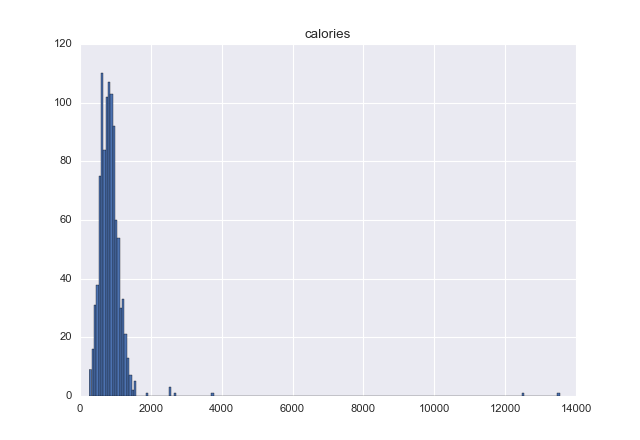

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a61bb00>]], dtype=object)

In [28]:
#Because calories is a calculated value based on many random numbers, we should look at the data for outliers.
sundae_df.hist(column='calories',bins=200)

In [29]:
# To find a good cut off for outliers, print the number of points over various cutoffs.  
# 3000 seems to be pretty robust on multiple runs of the random data set.
print(len(sundae_df[sundae_df['calories'] > 1500]))
print(len(sundae_df[sundae_df['calories'] > 2500]))
print(len(sundae_df[sundae_df['calories'] > 3000]))
print(len(sundae_df[sundae_df['calories'] > 4000]))
print(len(sundae_df[sundae_df['calories'] > 5000]))
print(len(sundae_df[sundae_df['calories'] > 8000]))

14
7
3
2
2
2


<IPython.core.display.Javascript object>


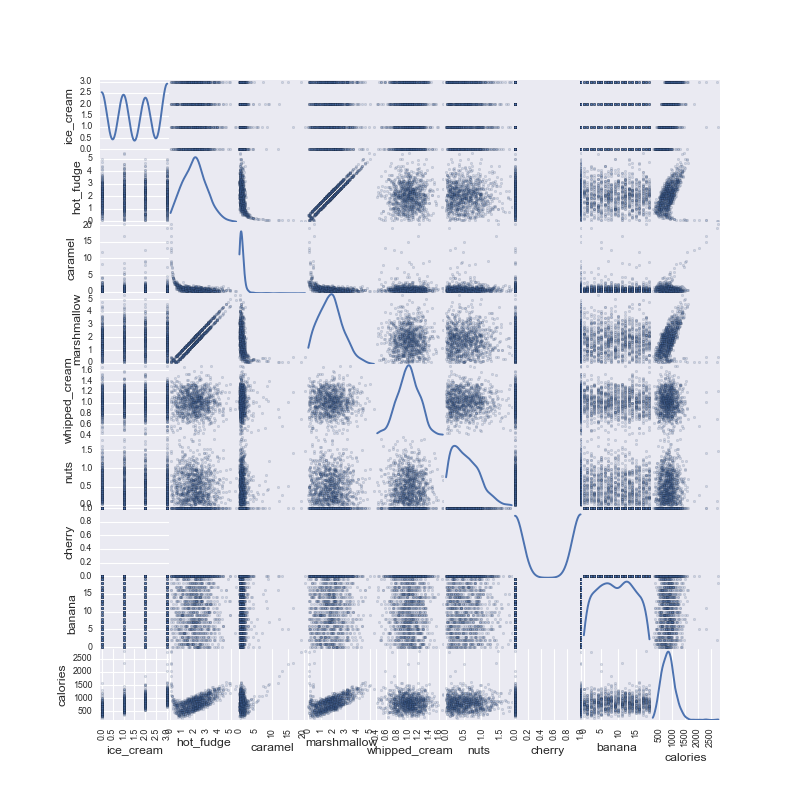

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ae93710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12d1d3ba8>]], dtype=object)

In [30]:
scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal='kde')

In [31]:
# Remove outliers and output data set for use in PCA.
df = sundae_df[sundae_df['calories'] < 3000] #remove outliers
df.to_csv('IceCreamSundaes.csv')